In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
# load data 1st data
calories = pd.read_csv('calories.csv')
calories.head()

User_ID  Calories
0  14733363     231.0
1  14861698      66.0
2  11179863      26.0
3  16180408      71.0
4  17771927      35.0

In [3]:
# Laod 2nd data
excercise = pd.read_csv('exercise.csv')
excercise.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8

In [7]:
# Join the these 2 data frames
calories_burn = pd.concat([excercise,calories['Calories']], axis=1)

In [8]:
# print first five rows calories_burn dataframes
calories_burn.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [9]:
# checking the size of dataset
calories_burn.shape

(15000, 9)

In [10]:
# Some information about data
calories_burn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [11]:
# missing values
calories_burn.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [12]:
# Statistical measures
calories_burn.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

# Data Visulization

In [13]:
sns.set()

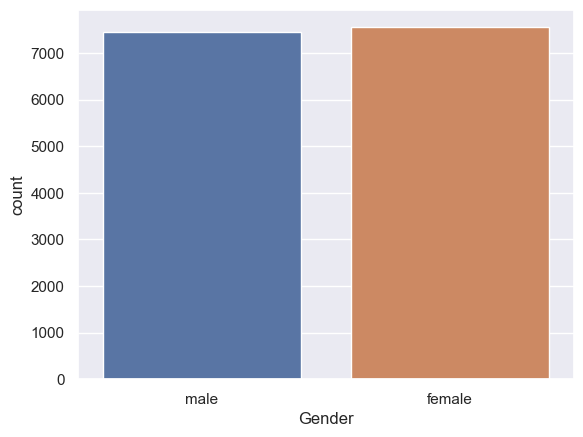

In [14]:
# check count of "Gender" columns
sns.countplot(x=calories_burn.Gender, data= calories_burn)
plt.show()

C:\Users\user.LAPTOP\AppData\Local\Temp\ipykernel_8444\2427543693.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_burn.Age)


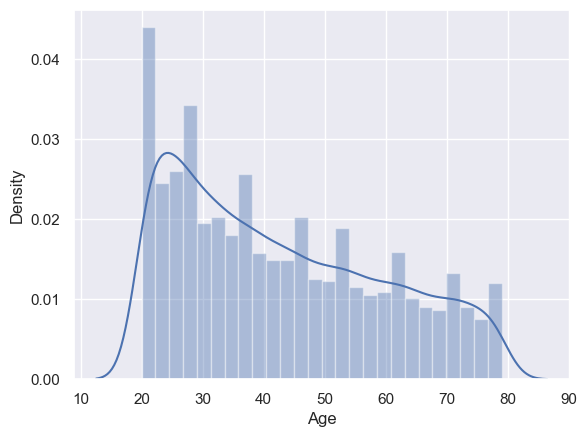

In [17]:
# Check the distribution of 'Age' columns
sns.distplot(calories_burn.Age)
plt.show()

C:\Users\user.LAPTOP\AppData\Local\Temp\ipykernel_8444\1082710860.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_burn.Height)


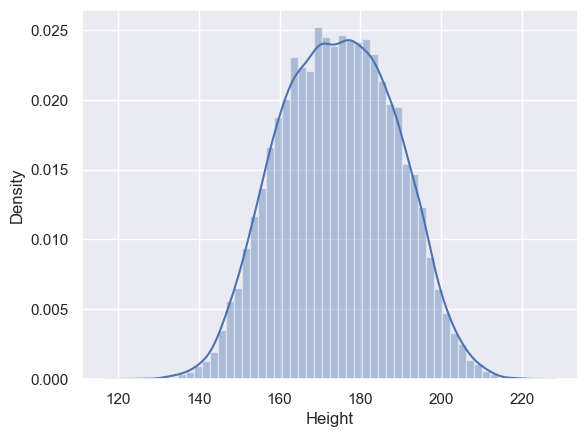

In [18]:
# Check the distribution of 'Height' columns
sns.distplot(calories_burn.Height)
plt.show()

C:\Users\user.LAPTOP\AppData\Local\Temp\ipykernel_8444\2735742111.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_burn.Weight)


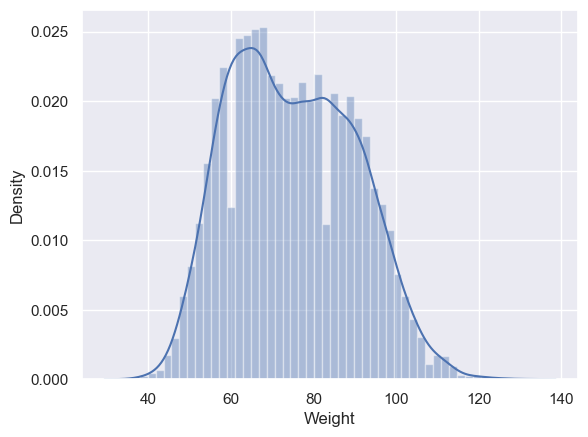

In [19]:
# Check the distribution of 'Weight' columns
sns.distplot(calories_burn.Weight)
plt.show()

C:\Users\user.LAPTOP\AppData\Local\Temp\ipykernel_8444\1520258258.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_burn.Duration)


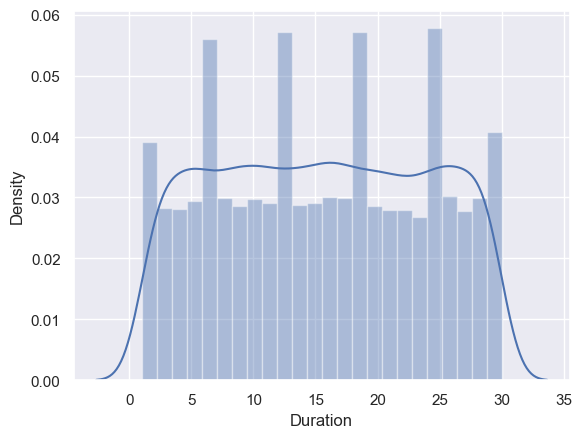

In [20]:
# Check the distribution of 'Duration' columns
sns.distplot(calories_burn.Duration)
plt.show()

C:\Users\user.LAPTOP\AppData\Local\Temp\ipykernel_8444\1567619236.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_burn.Heart_Rate)


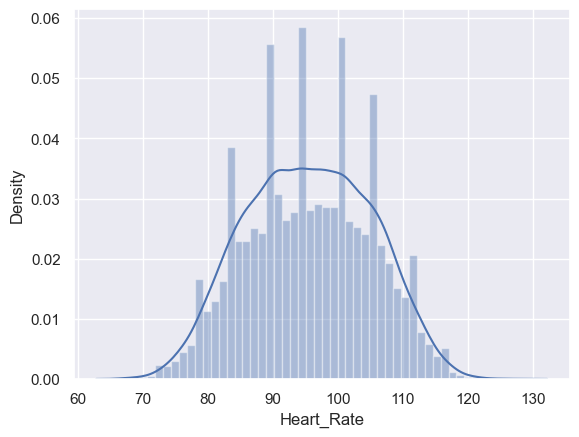

In [21]:
# Check the distribution of 'Heart_Rate' columns
sns.distplot(calories_burn.Heart_Rate)
plt.show()

C:\Users\user.LAPTOP\AppData\Local\Temp\ipykernel_8444\3071449419.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_burn.Body_Temp)


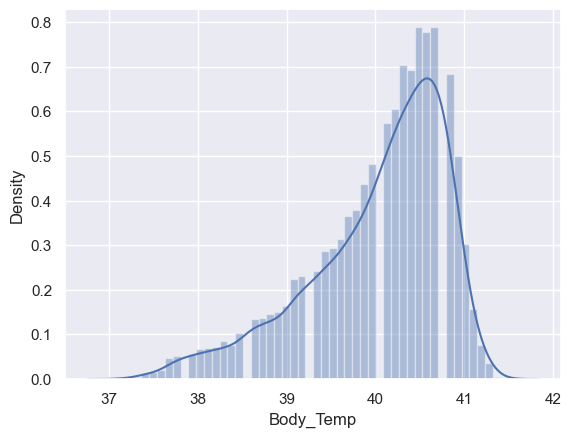

In [22]:
# Check the distribution of 'Body_Temp' columns
sns.distplot(calories_burn.Body_Temp)
plt.show()

C:\Users\user.LAPTOP\AppData\Local\Temp\ipykernel_8444\2162796903.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_burn.Calories)


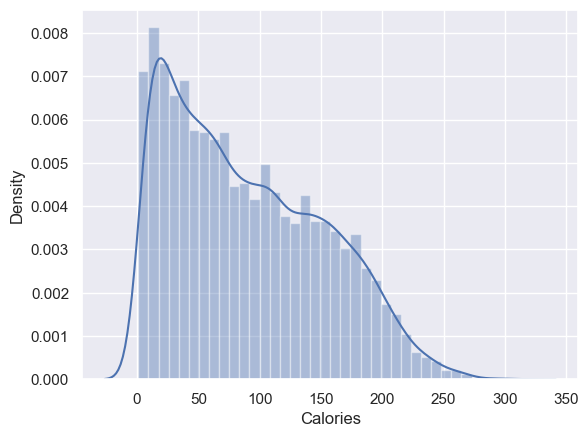

In [23]:
# Check the distribution of 'Calories' columns
sns.distplot(calories_burn.Calories)
plt.show()

## Correlation

In [25]:
corre = calories_burn.corr()

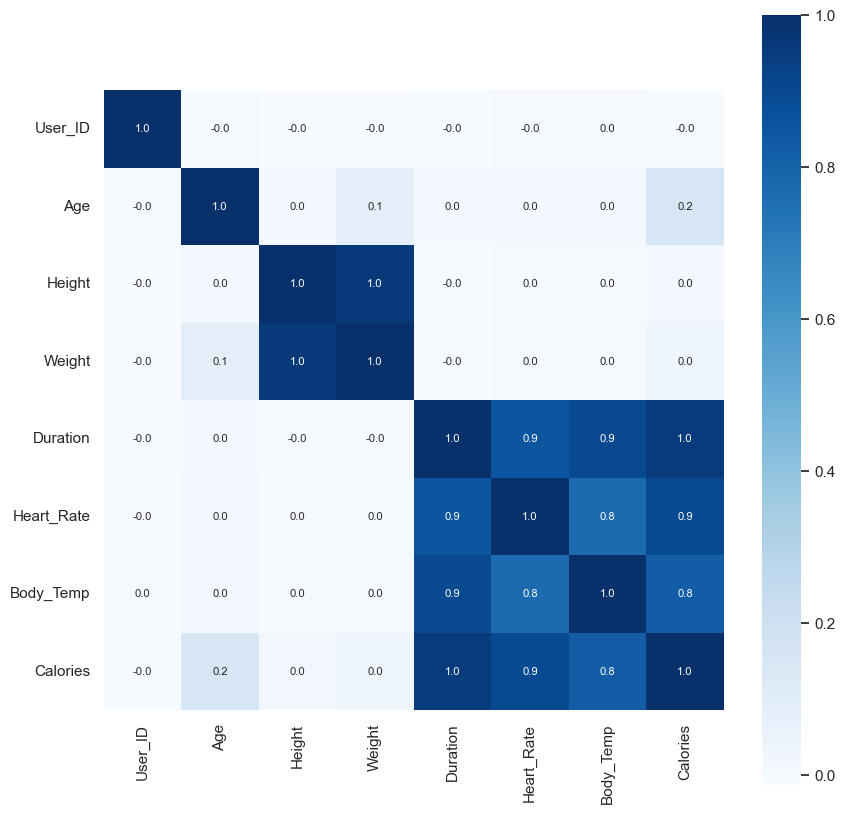

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(corre, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

## Encode

In [28]:
calories_burn.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [29]:
# Encode the "Gender " Columns
calories_burn.replace({'Gender':{'male':0,"female":1}}, inplace=True)

In [30]:
calories_burn.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363       0   68   190.0    94.0      29.0       105.0       40.8   
1  14861698       1   20   166.0    60.0      14.0        94.0       40.3   
2  11179863       0   69   179.0    79.0       5.0        88.0       38.7   
3  16180408       1   34   179.0    71.0      13.0       100.0       40.5   
4  17771927       1   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

# Separting the Features and target

In [31]:
X = calories_burn.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_burn['Calories']

In [32]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [33]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


# Split the data into train & test


In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)

In [36]:
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)

(15000, 7) (13500, 7) (1500, 7)
(15000,) (13500,) (1500,)


# Train the model

## XGBoost Regressor

In [37]:
model = XGBRegressor()

In [38]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Evalute the model

In [39]:
test_data_pred = model.predict(X_test)
print(test_data_pred)

[127.93282  224.29999   35.548733 ...  53.33989   65.64941  179.36435 ]


In [40]:
# Evalute the model by checking Mean Absolute ERROR on test data
score_1 = metrics.mean_absolute_error(Y_test,test_data_pred)
print('Mean Absolute ERROR  ', score_1)

Mean Absolute ERROR   1.3491418012523402


In [41]:
train_data_pred = model.predict(X_train)
print(train_data_pred)

[ 13.182564  99.386375  15.065028 ... 107.489555 179.37239   43.553497]


In [42]:
# Evalute the model by checking Mean Absolute ERROR on train data
score_2 = metrics.mean_absolute_error(Y_train,train_data_pred)
print('Mean Absolute ERROR  ', score_2)

Mean Absolute ERROR   0.9463350232254576


In [46]:
# Accuarcy ont train data
model.score(X_train,Y_train)

0.9995695029282609

In [48]:
# Accuracy in test data
model.score(X_test,Y_test)

0.999037815017492

## Make predective system

In [53]:
user_input = (1,32,157.0,54.0,18.0,93.0,40.4)

# convert the user_input into numpy asarray
numpy_asarray_input_uesr = np.asarray(user_input)

# reshape the numpy array 
numpy_asarray_input_uesr_reshape = numpy_asarray_input_uesr.reshape(1,-1)

# Predictive system
prediction = model.predict(numpy_asarray_input_uesr_reshape)
print('The Person will Callories Intake is = ',prediction)



The Person will Callories Intake is =  [89.32334]
